<a href="https://colab.research.google.com/github/beneditomacedo/dl_notebooks/blob/master/Alura_previsao_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Deep Learning: Previsao com Keras

##Aula 01 - Pre-processamento

### Entendendo a base de dados

In [1]:
import pandas as pd
passageiros = pd.read_csv('Passageiros.csv')

In [2]:
passageiros.head()

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


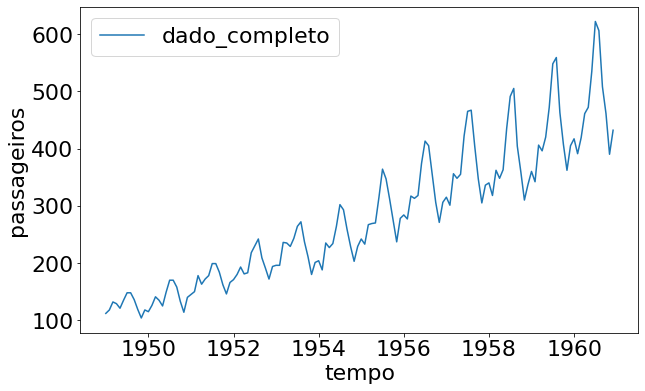

In [3]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10,6)
mpl.rcParams['font.size'] = 22

import seaborn as sns
sns.lineplot(x='tempo', y='passageiros', data=passageiros, label='dado_completo')

### Pre-processamento

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(passageiros)
dado_escalado = sc.transform(passageiros)
dado_escalado[0:5]

array([[-1.72006415, -1.40777884],
       [-1.69600731, -1.35759023],
       [-1.67195047, -1.24048348],
       [-1.64789363, -1.26557778],
       [-1.62383679, -1.33249593]])

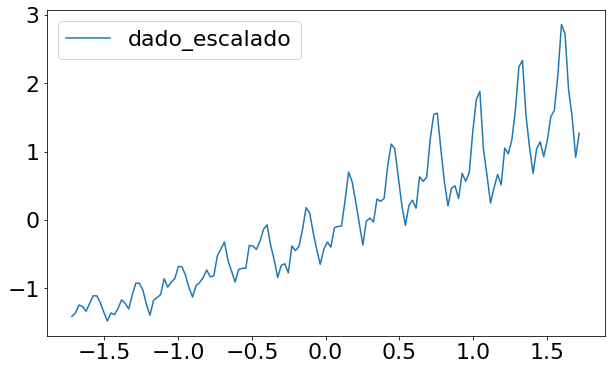

In [5]:
x = dado_escalado[:,0]
y = dado_escalado[:,1]
sns.lineplot(x=x, y=y, label='dado_escalado')

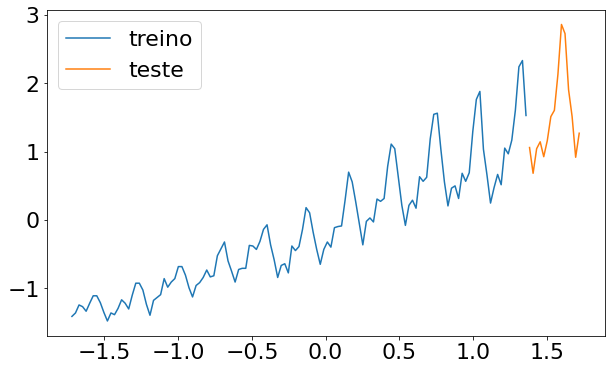

In [6]:
tamanho_base = len(dado_escalado)
tamanho_treino = int(tamanho_base * 0.9)

xtreino = x[0:tamanho_treino]
ytreino = y[0:tamanho_treino]

xteste = x[tamanho_treino:tamanho_base]
yteste = y[tamanho_treino:tamanho_base]

sns.lineplot(x=xtreino,y=ytreino,label='treino')
sns.lineplot(x=xteste,y=yteste,label='teste')

In [7]:
tam_base = len(x)
tam_treino = len(xtreino)
tam_teste = len(xteste)
print(f'O total de amostras e: {tam_base}. O tamanho da base de treino e: {tam_treino}. O tamanho da base de testes e: {tam_teste}')

O total de amostras e: 144. O tamanho da base de treino e: 129. O tamanho da base de testes e: 15


## Aula 02 -  Regressao

### Regressao

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
regressor = Sequential()
regressor.add(Dense(1,input_dim=1,kernel_initializer='Ones', activation='linear', use_bias=True))
regressor.compile(loss='mean_squared_error', optimizer='adam')
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


5/5 [==============================] - 0s 2ms/step - loss: 0.1284


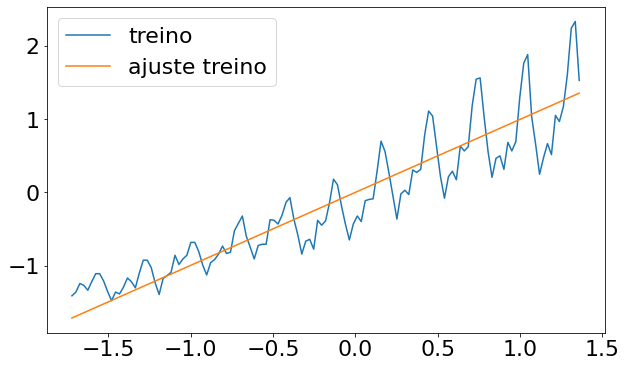

In [9]:
regressor.fit(xtreino, ytreino)
y_predictor = regressor.predict(xtreino)
sns.lineplot(x=xtreino,y=ytreino,label='treino')
sns.lineplot(x=xtreino,y=y_predictor[:,0],label='ajuste treino')

### Mudando a escala

In [10]:
d = {'tempo': xtreino, 'passageiros': y_predictor[:,0]}
resultados = pd.DataFrame(d)
resultados[0:5]

,tempo,passageiros
0,-1.720064,-1.710280
1,-1.696007,-1.686339
2,-1.671950,-1.662397
3,-1.647894,-1.638456
4,-1.623837,-1.614515


In [11]:
resultados_transf = sc.inverse_transform(resultados)
resultados_transf = pd.DataFrame(resultados_transf)
resultados_transf[0:5]

,0,1
0,1949.000000,75.836298
1,1949.083333,78.698440
2,1949.166667,81.560611
3,1949.250000,84.422754
4,1949.333333,87.284911


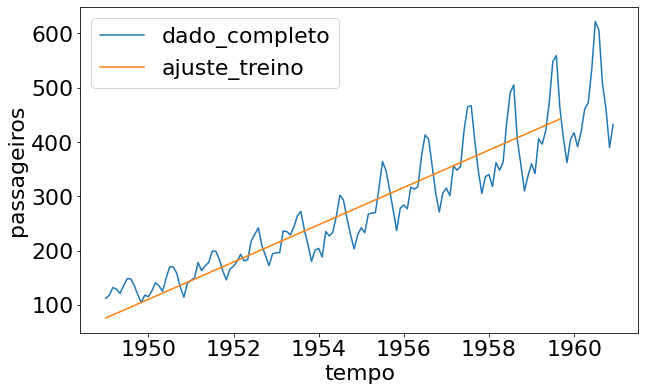

In [12]:
resultados_transf.columns = ['tempo', 'passageiros']
sns.lineplot(x='tempo',y='passageiros',data=passageiros,label='dado_completo')
sns.lineplot(x='tempo',y='passageiros',data=resultados_transf,label='ajuste_treino')

In [13]:
y_predict_teste = regressor.predict(xteste)
d = {'tempo': xteste, 'passageiros': y_predict_teste[:,0]}
resultados_teste = pd.DataFrame(data=d)
resultados_transf_teste = sc.inverse_transform(resultados_teste)
resultados_transf_teste = pd.DataFrame(resultados_transf_teste)
resultados_transf_teste.columns= ['tempo', 'passageiros']
resultados_transf_teste[0:5]

,tempo,passageiros
0,1959.750000,445.053867
1,1959.833333,447.916024
2,1959.916667,450.778166
3,1960.000000,453.640309
4,1960.083333,456.502480


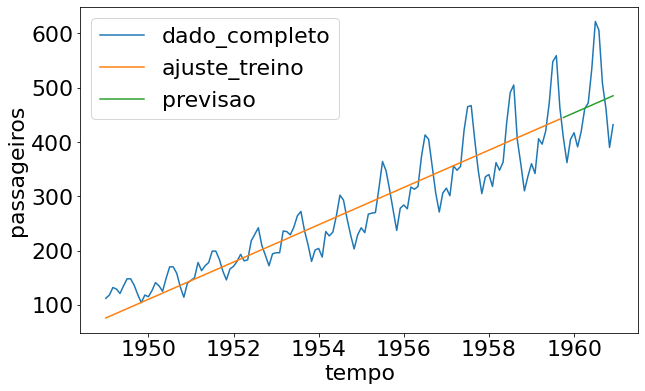

In [14]:
sns.lineplot(x='tempo',y='passageiros',data=passageiros,label='dado_completo')
sns.lineplot(x='tempo',y='passageiros',data=resultados_transf,label='ajuste_treino')
sns.lineplot(x='tempo',y='passageiros',data=resultados_transf_teste,label='previsao')

### Adicionando camadas

In [15]:
regressor2 = Sequential()
regressor2.add(Dense(8,input_dim=1,kernel_initializer='random_uniform', activation='linear', use_bias=False))
regressor2.add(Dense(8,kernel_initializer='random_uniform', activation='linear', use_bias=False))
regressor2.compile(loss='mean_squared_error', optimizer='adam')
regressor2.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 8         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 64        
Total params: 72
Trainable params: 72
Non-trainable params: 0
_________________________________________________________________


In [39]:
regressor2.fit(xtreino,ytreino, epochs=200,verbose=0)

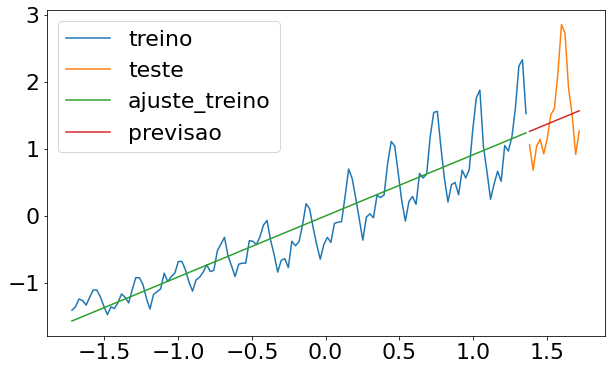

In [17]:
y_predict = regressor2.predict(xtreino)
y_predict_test = regressor2.predict(xteste)
sns.lineplot(x=xtreino,y=ytreino,label='treino')
sns.lineplot(x=xteste,y=yteste,label='teste')
sns.lineplot(x=xtreino,y=y_predict[:,0],label='ajuste_treino')
sns.lineplot(x=xteste,y=y_predict_test[:,0],label='previsao')

### Funcoes de Ativacao

In [18]:
regressor3 = Sequential()
regressor3.add(Dense(8,input_dim=1,kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))
regressor3.add(Dense(8,kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))
regressor3.compile(loss='mean_squared_error', optimizer='adam')
regressor3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 8)                 8         
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 64        
Total params: 72
Trainable params: 72
Non-trainable params: 0
_________________________________________________________________


In [40]:
regressor3.fit(xtreino,ytreino, epochs=200, verbose=0)

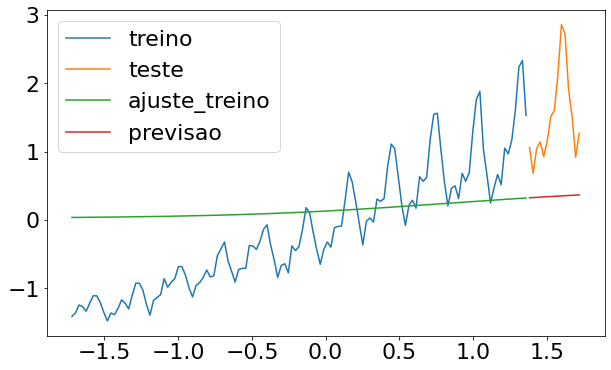

In [20]:
y_predict = regressor3.predict(xtreino)
y_predict_test = regressor3.predict(xteste)
sns.lineplot(x=xtreino,y=ytreino,label='treino')
sns.lineplot(x=xteste,y=yteste,label='teste')
sns.lineplot(x=xtreino,y=y_predict[:,0],label='ajuste_treino')
sns.lineplot(x=xteste,y=y_predict_test[:,0],label='previsao')

## Aula 03 - Reformulando o problema

### Alterando os dados

In [21]:
import numpy as np
def separa_dados(vetor, n_passos):
  x_novo, y_novo = [], []

  for i in range(n_passos, vetor.shape[0]):
    x_novo.append(list(vetor.loc[i-n_passos:i-1]))
    y_novo.append(vetor.loc[i])
  
  x_novo, y_novo = np.array(x_novo), np.array(y_novo)
  return x_novo, y_novo

In [22]:
vetor = pd.DataFrame(ytreino)[0]
xtreino_novo, ytreino_novo = separa_dados(vetor,1)

In [23]:
ytreino[0:5]

array([-1.40777884, -1.35759023, -1.24048348, -1.26557778, -1.33249593])

In [24]:
xtreino_novo[0:5]

array([[-1.40777884],
       [-1.35759023],
       [-1.24048348],
       [-1.26557778],
       [-1.33249593]])

In [25]:
ytreino_novo[0:5]

array([-1.35759023, -1.24048348, -1.26557778, -1.33249593, -1.21538918])

In [26]:
vetor2 = pd.DataFrame(yteste)[0]
xteste_novo, yteste_novo = separa_dados(vetor2,1)

### Treinando a rede

In [27]:
regressor4 = Sequential()
regressor4.add(Dense(8,input_dim=1,kernel_initializer='ones', activation='linear', use_bias=False))
regressor4.add(Dense(64,kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))
regressor4.add(Dense(1,kernel_initializer='random_uniform', activation='linear', use_bias=False))
regressor4.compile(loss='mean_squared_error', optimizer='adam')
regressor4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 8)                 8         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                512       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 64        
Total params: 584
Trainable params: 584
Non-trainable params: 0
_________________________________________________________________


In [28]:
regressor4.fit(xtreino_novo, ytreino_novo, epochs=100,verbose=0)

In [29]:
y_predict_novo = regressor4.predict(xtreino_novo)
y_predict_novo[0:5]


array([[-1.3052084],
       [-1.2685688],
       [-1.1792972],
       [-1.1988709],
       [-1.249884 ]], dtype=float32)

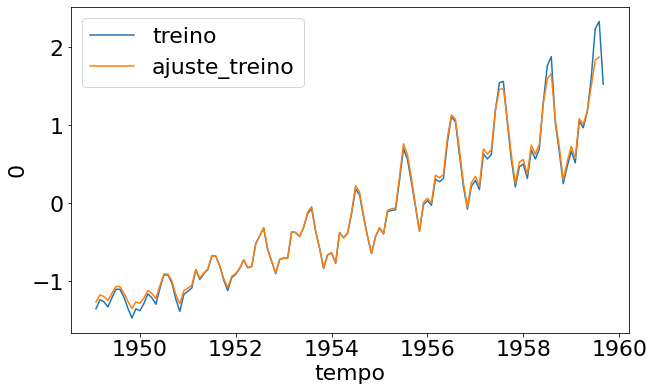

In [30]:
sns.lineplot(x='tempo',y=ytreino_novo,data=passageiros[1:129],label='treino')
sns.lineplot(x='tempo',y=pd.DataFrame(y_predict_novo)[0],data=passageiros[1:129],label='ajuste_treino')

In [31]:
y_predict_teste_novo = regressor4.predict(xteste_novo)
resultado = pd.DataFrame(y_predict_teste_novo)[0]

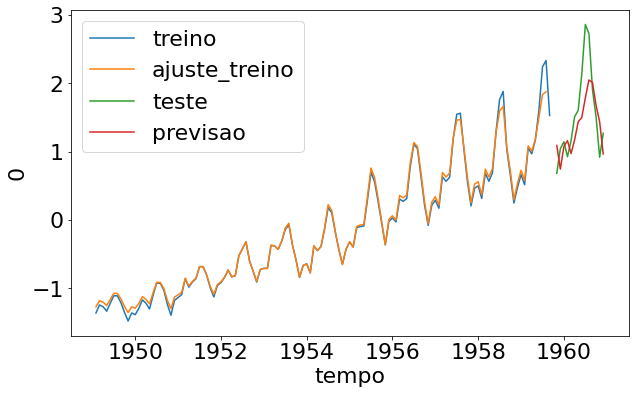

In [32]:
sns.lineplot(x='tempo',y=ytreino_novo,data=passageiros[1:129],label='treino')
sns.lineplot(x='tempo',y=pd.DataFrame(y_predict_novo)[0],data=passageiros[1:129],label='ajuste_treino')
sns.lineplot(x='tempo',y=yteste_novo,data=passageiros[130:144],label='teste')
sns.lineplot(x='tempo',y=resultado.values,data=passageiros[130:144],label='previsao')

### Janelas

In [33]:
xtreino_novo, ytreino_novo = separa_dados(vetor,4)

In [34]:
xtreino_novo[0:5]

array([[-1.40777884, -1.35759023, -1.24048348, -1.26557778],
       [-1.35759023, -1.24048348, -1.26557778, -1.33249593],
       [-1.24048348, -1.26557778, -1.33249593, -1.21538918],
       [-1.26557778, -1.33249593, -1.21538918, -1.10664719],
       [-1.33249593, -1.21538918, -1.10664719, -1.10664719]])

In [35]:
ytreino_novo[0:5]

array([-1.33249593, -1.21538918, -1.10664719, -1.10664719, -1.20702441])

In [36]:
regressor5 = Sequential()
regressor5.add(Dense(8,input_dim=4,kernel_initializer='ones', activation='linear', use_bias=False))
regressor5.add(Dense(64,kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))
regressor5.add(Dense(1,kernel_initializer='random_uniform', activation='linear', use_bias=False))
regressor5.compile(loss='mean_squared_error', optimizer='adam')
regressor5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 8)                 32        
_________________________________________________________________
dense_9 (Dense)              (None, 64)                512       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 64        
Total params: 608
Trainable params: 608
Non-trainable params: 0
_________________________________________________________________


In [37]:
regressor5.fit(xtreino_novo, ytreino_novo, epochs=100,verbose=0)

In [41]:
y_predict_novo = regressor5.predict(xtreino_novo)

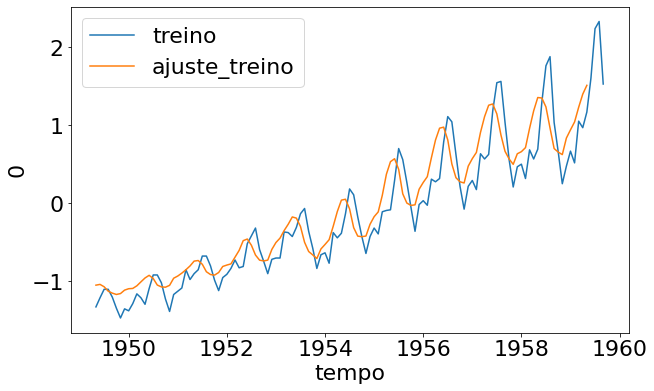

In [42]:
sns.lineplot(x='tempo',y=ytreino_novo,data=passageiros[4:129],label='treino')
sns.lineplot(x='tempo',y=pd.DataFrame(y_predict_novo)[0],data=passageiros[4:129],label='ajuste_treino')

In [44]:
xteste_novo, yteste_novo = separa_dados(vetor2,4)
y_predict_teste_novo = regressor5.predict(xteste_novo)
resultado = pd.DataFrame(y_predict_teste_novo)[0]

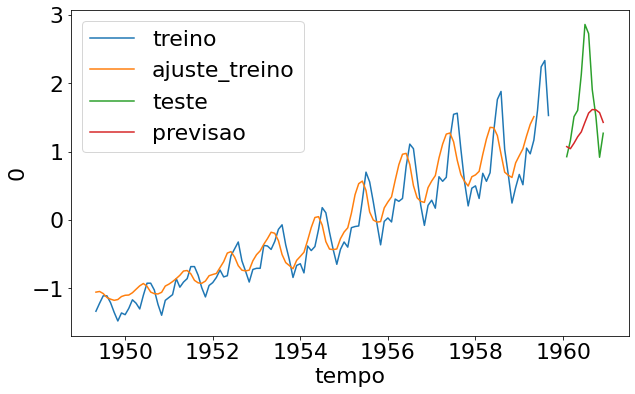

In [45]:
sns.lineplot(x='tempo',y=ytreino_novo,data=passageiros[4:129],label='treino')
sns.lineplot(x='tempo',y=pd.DataFrame(y_predict_novo)[0],data=passageiros[4:129],label='ajuste_treino')
sns.lineplot(x='tempo',y=yteste_novo,data=passageiros[133:144],label='teste')
sns.lineplot(x='tempo',y=resultado.values,data=passageiros[133:144],label='previsao')

## Aula 04 - Um novo problema

In [46]:
bike = pd.read_csv('bicicletas.csv')
bike[0:5]

,datas,contagem,temperatura,sensacao,umidade,vel_vento,clima,feriado,final_ds,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [47]:
bike.dtypes

datas           object
contagem         int64
temperatura    float64
sensacao       float64
umidade        float64
vel_vento      float64
clima          float64
feriado        float64
final_ds       float64
estacao        float64
dtype: object

In [48]:
bike['datas'] = pd.to_datetime(bike['datas'])
bike[0:5]

,datas,contagem,temperatura,sensacao,umidade,vel_vento,clima,feriado,final_ds,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [49]:
bike.dtypes

datas          datetime64[ns]
contagem                int64
temperatura           float64
sensacao              float64
umidade               float64
vel_vento             float64
clima                 float64
feriado               float64
final_ds              float64
estacao               float64
dtype: object

(array([735599., 735689., 735780., 735872., 735964., 736055., 736146.,
        736238., 736330.]), <a list of 9 Text major ticklabel objects>)

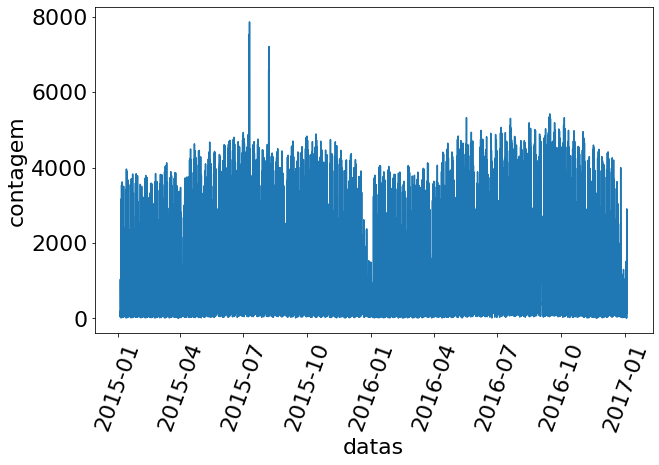

In [50]:
sns.lineplot(x='datas',y='contagem',data=bike)
import matplotlib.pyplot as plt
plt.xticks(rotation=70)

In [51]:
sc2 = StandardScaler()
sc2.fit(bike['contagem'].values.reshape(-1,1))
y=sc2.transform(bike['contagem'].values.reshape(-1,1))

In [52]:
tam_base = len(bike)
tam_treino = int(tam_base*0.9)
tam_teste = tam_base - tam_treino
print(f'O total de amostras e: {tam_base}. O tamanho da base de treino e: {tam_treino}. O tamanho da base de testes e: {tam_teste}')

O total de amostras e: 17414. O tamanho da base de treino e: 15672. O tamanho da base de testes e: 1742


In [53]:
ytreino = y[0:tam_treino]
yteste = y[tam_treino:tam_base]

(array([735599., 735689., 735780., 735872., 735964., 736055., 736146.,
        736238., 736330.]), <a list of 9 Text major ticklabel objects>)

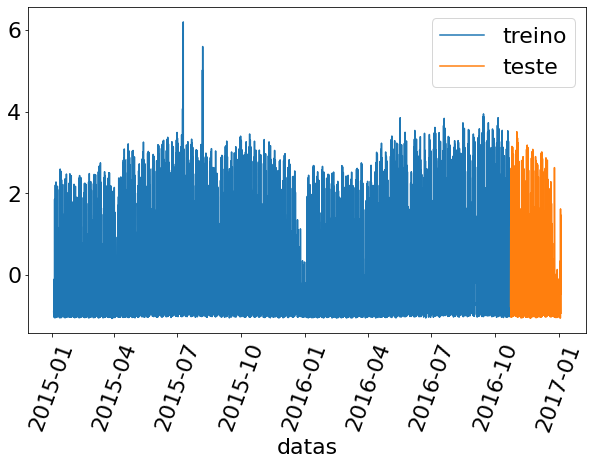

In [54]:
sns.lineplot(x='datas',y=ytreino[:,0],data=bike[0:tam_treino],label='treino')
sns.lineplot(x='datas',y=yteste[:,0],data=bike[tam_treino:tam_base],label='teste')
plt.xticks(rotation=70)

In [56]:
vetor_treino = pd.DataFrame(ytreino)[0]
xtreino_novo, ytreino_novo = separa_dados(vetor_treino, 10)
vetor_teste = pd.DataFrame(yteste)[0]
xteste_novo, yteste_novo = separa_dados(vetor_teste, 10)

In [64]:
xtreino_novo[0:2]

array([[-0.88574518, -0.9262953 , -0.92998167, -0.98712048, -1.01016032,
        -1.01108192, -1.00647395, -0.9843557 , -0.93274645, -0.77607553],
       [-0.9262953 , -0.92998167, -0.98712048, -1.01016032, -1.01108192,
        -1.00647395, -0.9843557 , -0.93274645, -0.77607553, -0.56687377]])

In [70]:
xtreino_novo = xtreino_novo.reshape(xtreino_novo.shape[0],xtreino_novo.shape[1],1)

In [77]:
xteste_novo = xteste_novo.reshape(xteste_novo.shape[0],xteste_novo.shape[1],1)

In [80]:
from tensorflow.keras.layers import LSTM 
recorrente = Sequential()
recorrente.add(LSTM(128,input_shape=(xtreino_novo.shape[1],xtreino_novo.shape[2])))
recorrente.add(Dense(units=1))
recorrente.compile(loss='mean_squared_error', optimizer='RMSProp')
recorrente.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128)               66560     
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


## 05 - Avaliando os resultados

### Avaliando a LSTM

In [ ]:
resultado = recorrente.fit(xtreino_novo,ytreino_novo, validation_data=(xteste_novo,yteste_novo), epochs = 100)

In [82]:
y_ajustado = recorrente.predict(xtreino_novo)

(array([735599., 735689., 735780., 735872., 735964., 736055., 736146.,
        736238.]), <a list of 8 Text major ticklabel objects>)

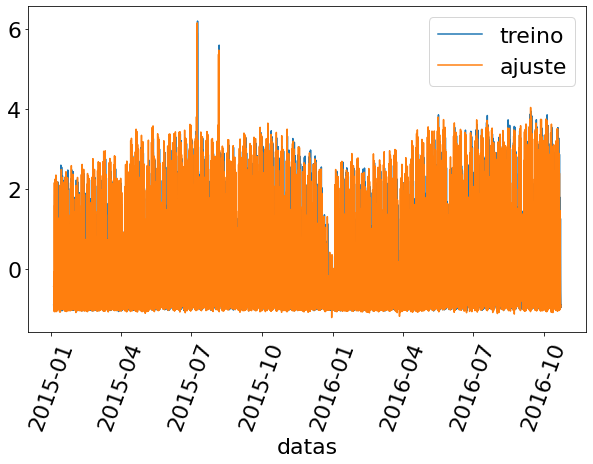

In [90]:
sns.lineplot(x='datas',y=ytreino[:,0], data=bike[0:tam_treino], label='treino')
sns.lineplot(x='datas',y=y_ajustado[:,0], data=bike[0:tam_treino-10], label='ajuste')
plt.xticks(rotation=70)

In [92]:
y_ajustado_novo = recorrente.predict(xteste_novo)

(array([735599., 735689., 735780., 735872., 735964., 736055., 736146.,
        736238., 736330.]), <a list of 9 Text major ticklabel objects>)

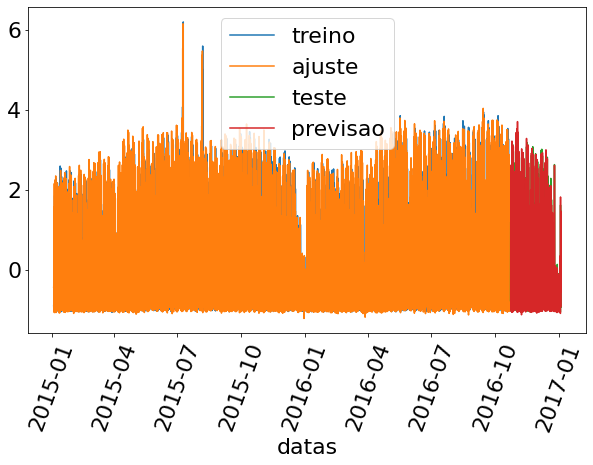

In [95]:
sns.lineplot(x='datas',y=ytreino[:,0], data=bike[0:tam_treino], label='treino')
sns.lineplot(x='datas',y=y_ajustado[:,0], data=bike[0:tam_treino-10], label='ajuste')
sns.lineplot(x='datas',y=yteste[:,0], data=bike[tam_treino:tam_base], label='teste')
sns.lineplot(x='datas',y=y_ajustado_novo[:,0], data=bike[tam_treino+10:tam_base], label='previsao')
plt.xticks(rotation=70)

(array([736269., 736283., 736299., 736313., 736330.]),
 <a list of 5 Text major ticklabel objects>)

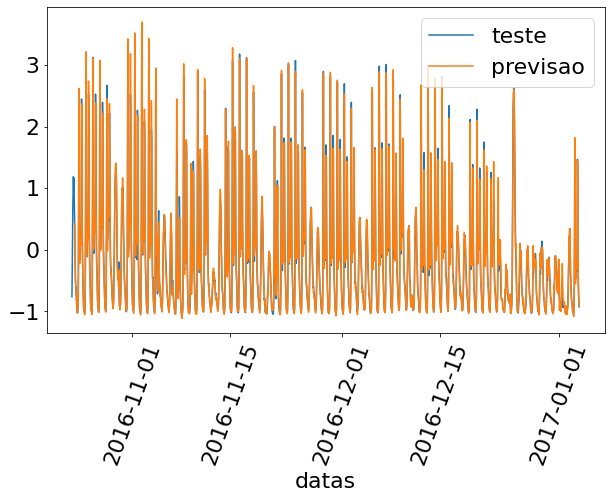

In [96]:
sns.lineplot(x='datas',y=yteste[:,0], data=bike[tam_treino:tam_base], label='teste')
sns.lineplot(x='datas',y=y_ajustado_novo[:,0], data=bike[tam_treino+10:tam_base], label='previsao')
plt.xticks(rotation=70)

### Unidade recorrente fechada

In [97]:
from tensorflow.keras.layers import GRU

In [98]:
recorrente2 = Sequential()
recorrente2.add(GRU(128,input_shape=(xtreino_novo.shape[1],xtreino_novo.shape[2])))
recorrente2.add(Dense(units=1))
recorrente2.compile(loss='mean_squared_error', optimizer='RMSProp')
recorrente2.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 128)               50304     
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 129       
Total params: 50,433
Trainable params: 50,433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
resultado2 = recorrente2.fit(xtreino_novo,ytreino_novo, validation_data=(xteste_novo,yteste_novo), epochs = 100)

In [100]:
y_ajustado_novo = recorrente2.predict(xteste_novo)

(array([736269., 736283., 736299., 736313., 736330.]),
 <a list of 5 Text major ticklabel objects>)

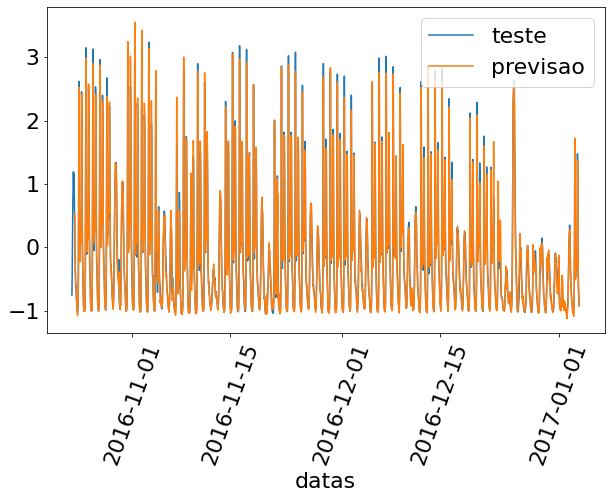

In [101]:
sns.lineplot(x='datas',y=yteste[:,0], data=bike[tam_treino:tam_base], label='teste')
sns.lineplot(x='datas',y=y_ajustado_novo[:,0], data=bike[tam_treino+10:tam_base], label='previsao')
plt.xticks(rotation=70)

Text(0, 0.5, 'Custo')

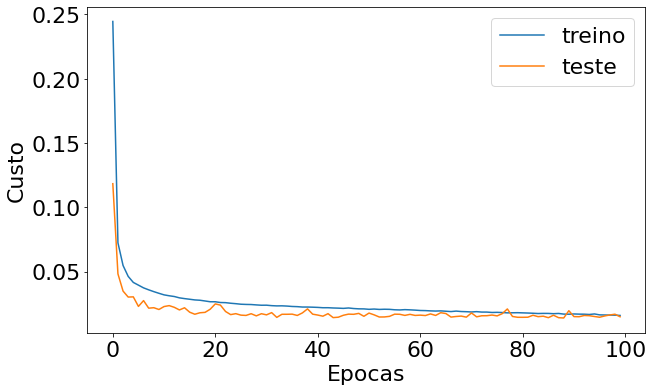

In [112]:
plt.plot(resultado.history['loss'])
plt.plot(resultado.history['val_loss'])
plt.legend(['treino','teste'])
plt.xlabel('Epocas')
plt.ylabel('Custo')

Text(0, 0.5, 'Custo')

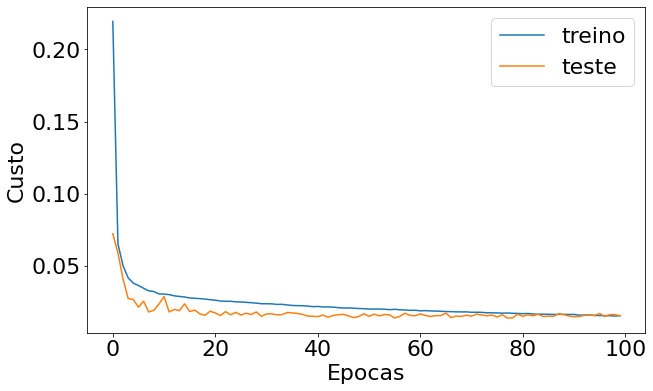

In [113]:
plt.plot(resultado2.history['loss'])
plt.plot(resultado2.history['val_loss'])
plt.legend(['treino','teste'])
plt.xlabel('Epocas')
plt.ylabel('Custo')